## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/raw_data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,id,gender,customer_type,age,type_of_travel,Class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
df.isnull().sum()

id                                     0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
Class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on_board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

In [8]:
# Simple Imputer to replace the null values
imputer = SimpleImputer(strategy='median')
df['arrival_delay_in_minutes']=imputer.fit_transform(df[['arrival_delay_in_minutes']])

In [9]:
df.isnull().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
Class                                0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

#### Preparing X and Y variables

In [10]:
X = df.drop(columns=['satisfaction'],axis=1)

In [11]:
X.head()

,id,gender,customer_type,age,type_of_travel,Class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
X[2]

In [12]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'id':
[ 70172   5047 110028 ...  68825  54173  62567]

Unique values for column 'gender':
['Male' 'Female']

Unique values for column 'customer_type':
['Loyal Customer' 'disloyal Customer']

Unique values for column 'age':
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]

Unique values for column 'type_of_travel':
['Personal Travel' 'Business travel']

Unique values for column 'Class':
['Eco Plus' 'Business' 'Eco']

Unique values for column 'flight_distance':
[ 460  235 1142 ...  974 1479  400]

Unique values for column 'inflight_wifi_service':
[3 2 4 1 5 0]

Unique values for column 'departure_arrival_time_convenient':
[4 2 5 3 1 0]

Unique values for column 'ease_of_online_booking':
[3 2 5 4 1 0]

Unique values for column 'gate_location':
[1 3 2 5 4 0]

Unique values for column 'fo

In [13]:
y = df['satisfaction']

In [14]:
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

In [15]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X

array([[ 0.        ,  1.        ,  1.        , ...,  1.30586973,
         0.26639265,  0.07416916],
       [ 0.        ,  1.        ,  0.        , ..., -1.74229153,
        -0.36137482, -0.23631279],
       [ 1.        ,  0.        ,  1.        , ...,  1.30586973,
        -0.3875318 , -0.39155376],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.54382941,
        -0.20443295, -0.02932482],
       [ 1.        ,  0.        ,  0.        , ..., -1.74229153,
        -0.3875318 , -0.39155376],
       [ 0.        ,  1.        ,  1.        , ..., -1.74229153,
        -0.3875318 , -0.39155376]])

In [18]:
X.shape

(103904, 28)

In [19]:
# Encoding the Y values 
le=LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((83123, 28), (20781, 28))

#### Create an Evaluate Function to give all metrics after model Training

In [21]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

In [22]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier":SVC(),
    "XGB Classifier": XGBClassifier(),
    "CatBoost Classifier":CatBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [25]:
params={
    "Logistic Regression":{
        # 'penalty':['l1','l2','elasticnet']
    },
    "K-Neighbors Classifier":{},
    "Decision Tree Classifier": {
        'criterion':['gini', 'entropy', 'log_loss'],
        'splitter':['best','random'],
        'max_features':['sqrt','log2',None],
    },
    "Random Forest Classifier":{
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_features':['sqrt','log2',None],
        'n_estimators': [8,16,32,64,128,256]
    },
    "Support Vector Classifier":{
        'kernel':['linear','poly','rbf','sigmoid','precomputed']
    },
    "XGB Classifier":{
        'learning_rate':[.1,.01,.05,.001],
        'n_estimators': [8,16,32,64,128,256]
    },
    "CatBoost Classifier":{
        'depth': [6,8,10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [30, 50, 100]
    },
    "Gradient Boosting Classifier":{
        'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
        'learning_rate':[.1,.01,.05,.001],
        'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
        'criterion':['squared_error', 'friedman_mse'],
        'max_features':['auto','sqrt','log2'],
        'n_estimators': [8,16,32,64,128,256]
    },
    "AdaBoost Classifier":{
        'learning_rate':[.1,.01,0.5,.001],
        'loss':['linear','square','exponential'],
        'n_estimators': [8,16,32,64,128,256]
    }
}

In [26]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    para=params[list(models.keys())[i]]

    gs = GridSearchCV(model,para,cv=3)
    gs.fit(X_train,y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_acc , model_train_precision, model_train_recall, model_train_f1_score = evaluate_model(y_train, y_train_pred)

    model_test_acc , model_test_precision, model_test_recall, model_test_f1_score = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_train_acc))
    print("- Precision Score: {:.4f}".format(model_train_precision))
    print("- Recall Score: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_acc))
    print("- Precision Score: {:.4f}".format(model_test_precision))
    print("- Recall Score: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    r2_list.append(model_test_acc)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy Score: 0.8756
- Precision Score: 0.8754
- Recall Score: 0.8756
- F1 Score: 0.8752
----------------------------------
Model performance for Test set
- Accuracy Score: 0.8786
- Precision Score: 0.8786
- Recall Score: 0.8786
- F1 Score: 0.8783


K-Neighbors Classifier
Model performance for Training set
- Accuracy Score: 0.9485
- Precision Score: 0.9490
- Recall Score: 0.9485
- F1 Score: 0.9483
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9291
- Precision Score: 0.9298
- Recall Score: 0.9291
- F1 Score: 0.9288


Decision Tree Classifier
Model performance for Training set
- Accuracy Score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9486
- Precision Score: 0.9486
- Recall Score: 0.9486
- F1 Score: 0.9486


Random Forest Classifier
Model performance for Training set
- Acc

### Results

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,CatBoost Classifier,0.965257
3,Random Forest Classifier,0.965064
5,XGB Classifier,0.963572
4,Support Vector Classifier,0.954093
2,Decision Tree Classifier,0.946393
7,Gradient Boosting Classifier,0.944180
8,AdaBoost Classifier,0.929407
1,K-Neighbors Classifier,0.929070
0,Logistic Regression,0.878639


In [ ]:

clf_model = RandomForestClassifier()
clf_model = clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy of the model is: {:.2f}%".format(accuracy * 100))
print("Precision of the model is: {:.2f}".format(precision))
print("Recall of the model is: {:.2f}".format(recall))
print("F1-score of the model is: {:.2f}".format(f1))

Accuracy of the model is: 96.51%
Precision of the model is: 0.97
Recall of the model is: 0.97
F1-score of the model is: 0.97


In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[11514,   199],
       [  518,  8550]], dtype=int64)

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.98      0.94      0.96      9068

    accuracy                           0.97     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.97      0.97      0.97     20781



## Plot y_pred and y_test

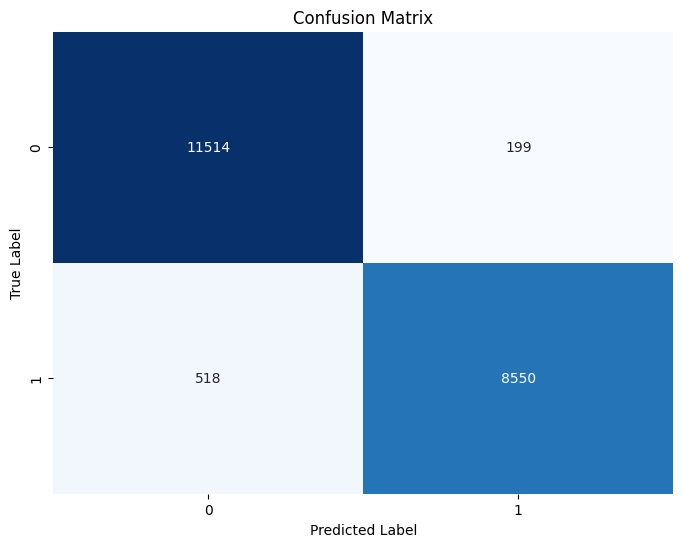

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
20776,0,0,0
20777,0,0,0
20778,0,0,0
20779,1,1,0
